# <a id='toc1_'></a>[analyze data](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [analyze data](#toc1_)    
  - [short dataset](#toc1_1_)    
  - [condensed data](#toc1_2_)    
  - [interactive](#toc1_3_)    
  - [analysis showcase 📈](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [3]:
import os
import pandas as pd
from pathlib import Path
from pandas_plots import tbl, pls
from pandas_plots.hlp import add_bitmask_label

os.environ["THEME"]="dark"

dir_data_in=Path("../data/in")
dir_data_out=Path("../data/out")

## <a id='toc1_1_'></a>[short dataset](#toc0_)
- all empty columns have been removed

🔵 *** df: short ***
🟣 shape: (195, 146) columns: ['Participant ID' 'Survey Timestamp' '[02.01] Basics - Datum'
 '[01.01] Bewertung - CTCAE-Bewertung'
 '[01.02] Wann ist das AE erstmals aufgetreten?'
 '[01.03] Bewertung - Glauben Sie, dass das AE mit dem Sport assoziiert ist?'
 '[02.02] Basics - Was war das AE?  (choice=Schmerzen)'
 '[02.02] Basics - Was war das AE?  (choice=Übelkeit/ Erbrechen)'
 '[02.02] Basics - Was war das AE?  (choice=Oberflächliche Verletzungen)'
 '[02.02] Basics - Was war das AE?  (choice=Kreislaufprobleme)'
 '[02.02] Basics - Was war das AE?  (choice=Knochenverletzungen)'
 '[02.02] Basics - Was war das AE?  (choice=Starke Erschöpfung)'
 '[02.02] Basics - Was war das AE?  (choice=Hustenanfall)'
 '[02.02] Basics - Was war das AE?  (choice=Enuresis)'
 '[02.02] Basics - Was war das AE?  (choice=Juckreiz)'
 '[02.02] Basics - Was war das AE?  (choice=Psychische Stressreaktion)'
 '[02.02] Basics - Was war das AE?  (choice=Nasenbluten)'
 '[02.02] Basics - Was war das AE

,Participant ID,Survey Timestamp,[02.01] Basics - Datum,[01.01] Bewertung - CTCAE-Bewertung,[01.02] Wann ist das AE erstmals aufgetreten?,"[01.03] Bewertung - Glauben Sie, dass das AE mit dem Sport assoziiert ist?",[02.02] Basics - Was war das AE? (choice=Schmerzen),[02.02] Basics - Was war das AE? (choice=Übelkeit/ Erbrechen),[02.02] Basics - Was war das AE? (choice=Oberflächliche Verletzungen),[02.02] Basics - Was war das AE? (choice=Kreislaufprobleme),...,[05.08] Rahmenbedingungen - In welcher Phase der geplanten Sporteinheit trat das AE auf?,[05.09] Rahmenbedingungen - Welchen Trainingszustand hatte der / die Betroffene zum Zeitpunkt als das AE auftrat? (choice=1 Gut),[05.09] Rahmenbedingungen - Welchen Trainingszustand hatte der / die Betroffene zum Zeitpunkt als das AE auftrat? (choice=2 Durchschnittlich),[05.09] Rahmenbedingungen - Welchen Trainingszustand hatte der / die Betroffene zum Zeitpunkt als das AE auftrat? (choice=3 Mäßig),[05.09] Rahmenbedingungen - Welchen Trainingszustand hatte der / die Betroffene zum Zeitpunkt als das AE auftrat? (choice=4 Weiß nicht),[05.09] Rahmenbedingungen - Welchen Trainingszustand hatte der / die Betroffene zum Zeitpunkt als das AE auftrat? (choice=5 Anmerkung),[06.11] Freitext - Rahmenbedingungen - Anmerkung,[07.01] Meldung - An welchem NAOK-Standort ist das AE aufgetreten?,[07.02] Meldung - Wie viele Sporteinheiten finden ca. jährlich am Standort statt?,Complete?
0,3,2022-10-13 13:41:16,2022-10-01,2.0,Das AE war vor dem Sport bereits vorhanden und...,No,Unchecked,Checked,Unchecked,Unchecked,...,2. Hälfte,Unchecked,Checked,Unchecked,Unchecked,Unchecked,<NA>,Essen,<NA>,Complete
1,4,2022-11-08 09:19:23,2022-10-01,1.0,Das AE ist neu aufgetreten.,Yes,Checked,Unchecked,Unchecked,Unchecked,...,1. Hälfte,Checked,Unchecked,Unchecked,Unchecked,Unchecked,<NA>,Essen,<NA>,Complete
2,5,2022-11-08 09:31:05,2022-11-01,2.0,Das AE war vor dem Sport bereits vorhanden und...,No,Unchecked,Unchecked,Unchecked,Checked,...,2. Hälfte,Unchecked,Unchecked,Checked,Unchecked,Checked,red. AZ,Essen,<NA>,Complete


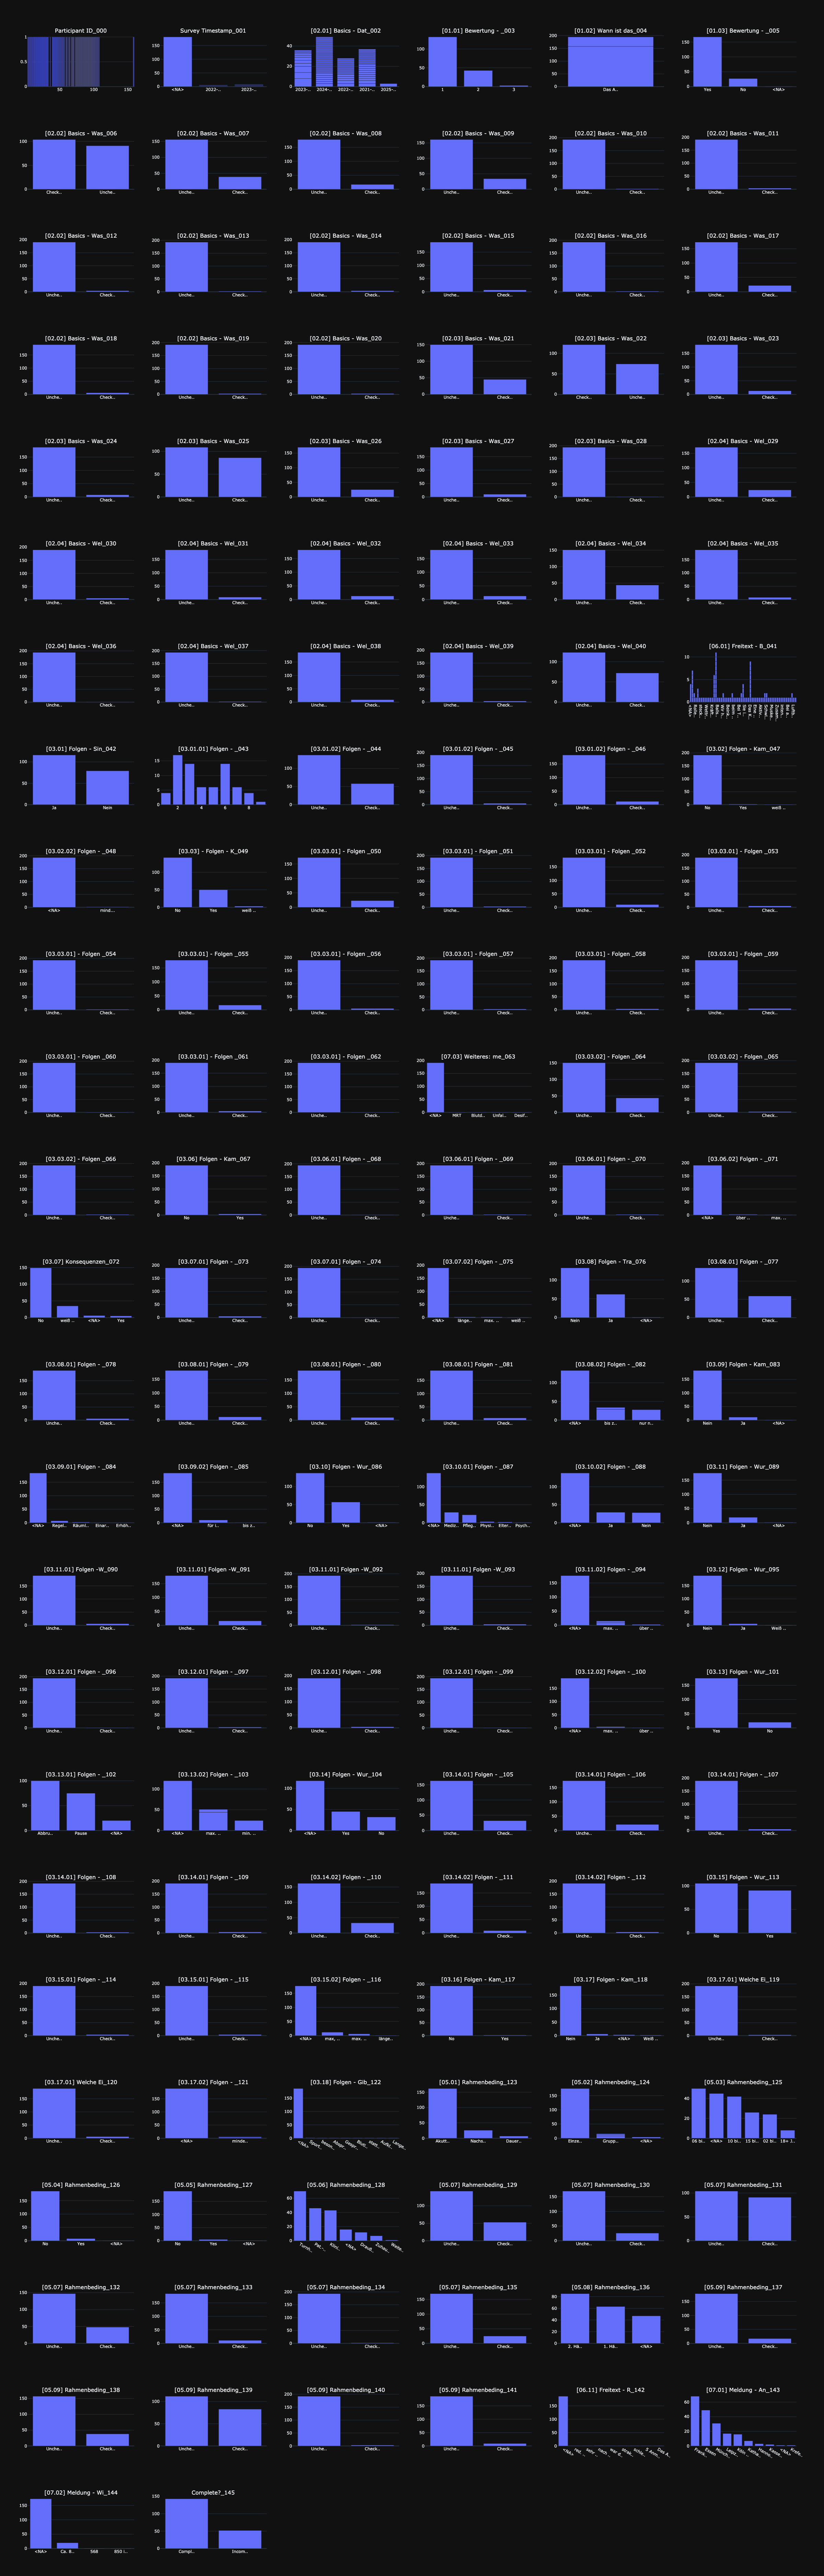

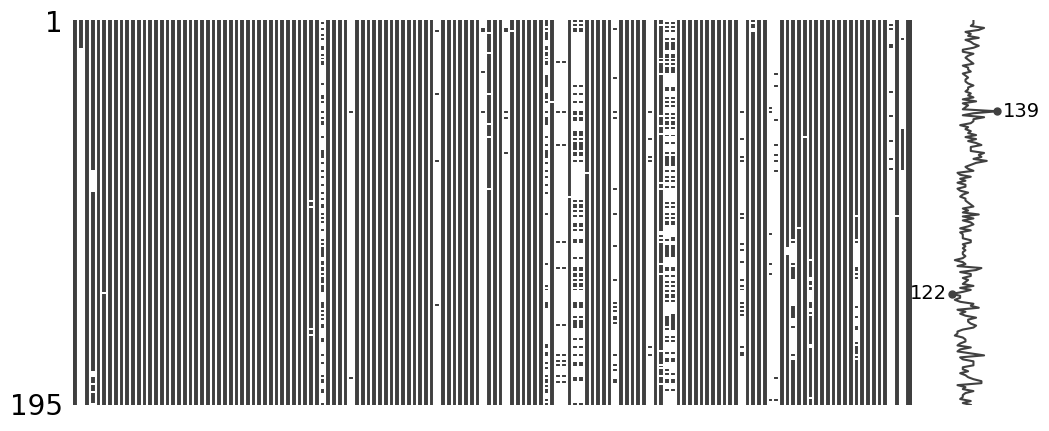

In [4]:
df_csv_short = pd.read_csv(dir_data_out / "df_csv_short.csv", sep=";", encoding="utf-8-sig")

tbl.describe_df(df_csv_short.iloc[:,:], "short", top_n_uniques=5, top_n_chars_in_index=5, use_plot=True, top_n_chars_in_columns=20, use_missing=True, fig_cols=6)

## <a id='toc1_2_'></a>[condensed data](#toc0_)
- defined columns have been transformed

In [5]:
def get_cols(all_cols: list[str], stubs = list[str]):
    return [col for col in all_cols if any(match in col for match in stubs)]


🔵 *** df: condensed ***
🟣 shape: (195, 69) columns: ['Participant ID' '[01.01] Bewertung - CTCAE-Bewertung'
 '[01.02] Wann ist das AE erstmals aufgetreten?'
 '[01.03] Bewertung - Glauben Sie, dass das AE mit dem Sport assoziiert ist?'
 '[06.01] Freitext - Basics - Genaue Beschreibung zur Entstehung, des Auslösers und zur Art des AE.'
 '[03.01] Folgen - Sind Schmerzen aufgetreten?'
 '[03.01.01] Folgen - Schmerzskala'
 '[03.02] Folgen - Kam es zu einem Krankenhausaufenthalt oder einer Verlängerung eines solchen?'
 '[03.02.01] Folgen - Wie zeitnah anch dem AE wurde entschieden einen Krankehausaufenthalt anzustreben oder zu verlängern?'
 '[03.02.02] Folgen - Wie lange dauerte der (verlängerte) Krankenhausaufenthalt an?'
 '[03.03] - Folgen - Kam es zu einer medizinischen Weiterbehandlung?'
 '[03.04] Folgen - Kam es zu einer deutlichen Verzögerung bei der Einhaltung des medizinischen Therapieprotokolls?'
 '[03.04.02] Folgen - Wie lange wurde der Zeitplan des Therapieprotokolls verzögert ?'
 

,Participant ID,[01.01] Bewertung - CTCAE-Bewertung,[01.02] Wann ist das AE erstmals aufgetreten?,"[01.03] Bewertung - Glauben Sie, dass das AE mit dem Sport assoziiert ist?","[06.01] Freitext - Basics - Genaue Beschreibung zur Entstehung, des Auslösers und zur Art des AE.",[03.01] Folgen - Sind Schmerzen aufgetreten?,[03.01.01] Folgen - Schmerzskala,[03.02] Folgen - Kam es zu einem Krankenhausaufenthalt oder einer Verlängerung eines solchen?,[03.02.01] Folgen - Wie zeitnah anch dem AE wurde entschieden einen Krankehausaufenthalt anzustreben oder zu verlängern?,[03.02.02] Folgen - Wie lange dauerte der (verlängerte) Krankenhausaufenthalt an?,...,[03.03.01],[03.04.01],[03.05.01],[03.06.01],[03.07.01],[03.08.01],[03.11.01],[03.12.01],[03.14.01],[03.17.01]
0,3,2,Das AE war vor dem Sport bereits vorhanden und...,No,Beim moderaten Tischtennisspielen wurde der Pa...,Nein,NaN,No,<NA>,<NA>,...,-,-,-,-,-,bei dem Betroffenen selbst,-,-,-,-
1,4,1,Das AE ist neu aufgetreten.,Yes,Luftballonspiel im Stehen; Kind hat sich gestr...,Ja,2.0,No,<NA>,<NA>,...,-,-,-,-,-,bei dem Betroffenen selbst|im Behandlungsteam,-,-,Übungsauswahl|Intensität,-
2,5,2,Das AE war vor dem Sport bereits vorhanden und...,No,Beim leichter Mobilisation und Aktivierung hat...,Nein,NaN,No,<NA>,<NA>,...,Medikamentengabe oral,-,-,-,-,bei dem Betroffenen selbst,-,-,-,-


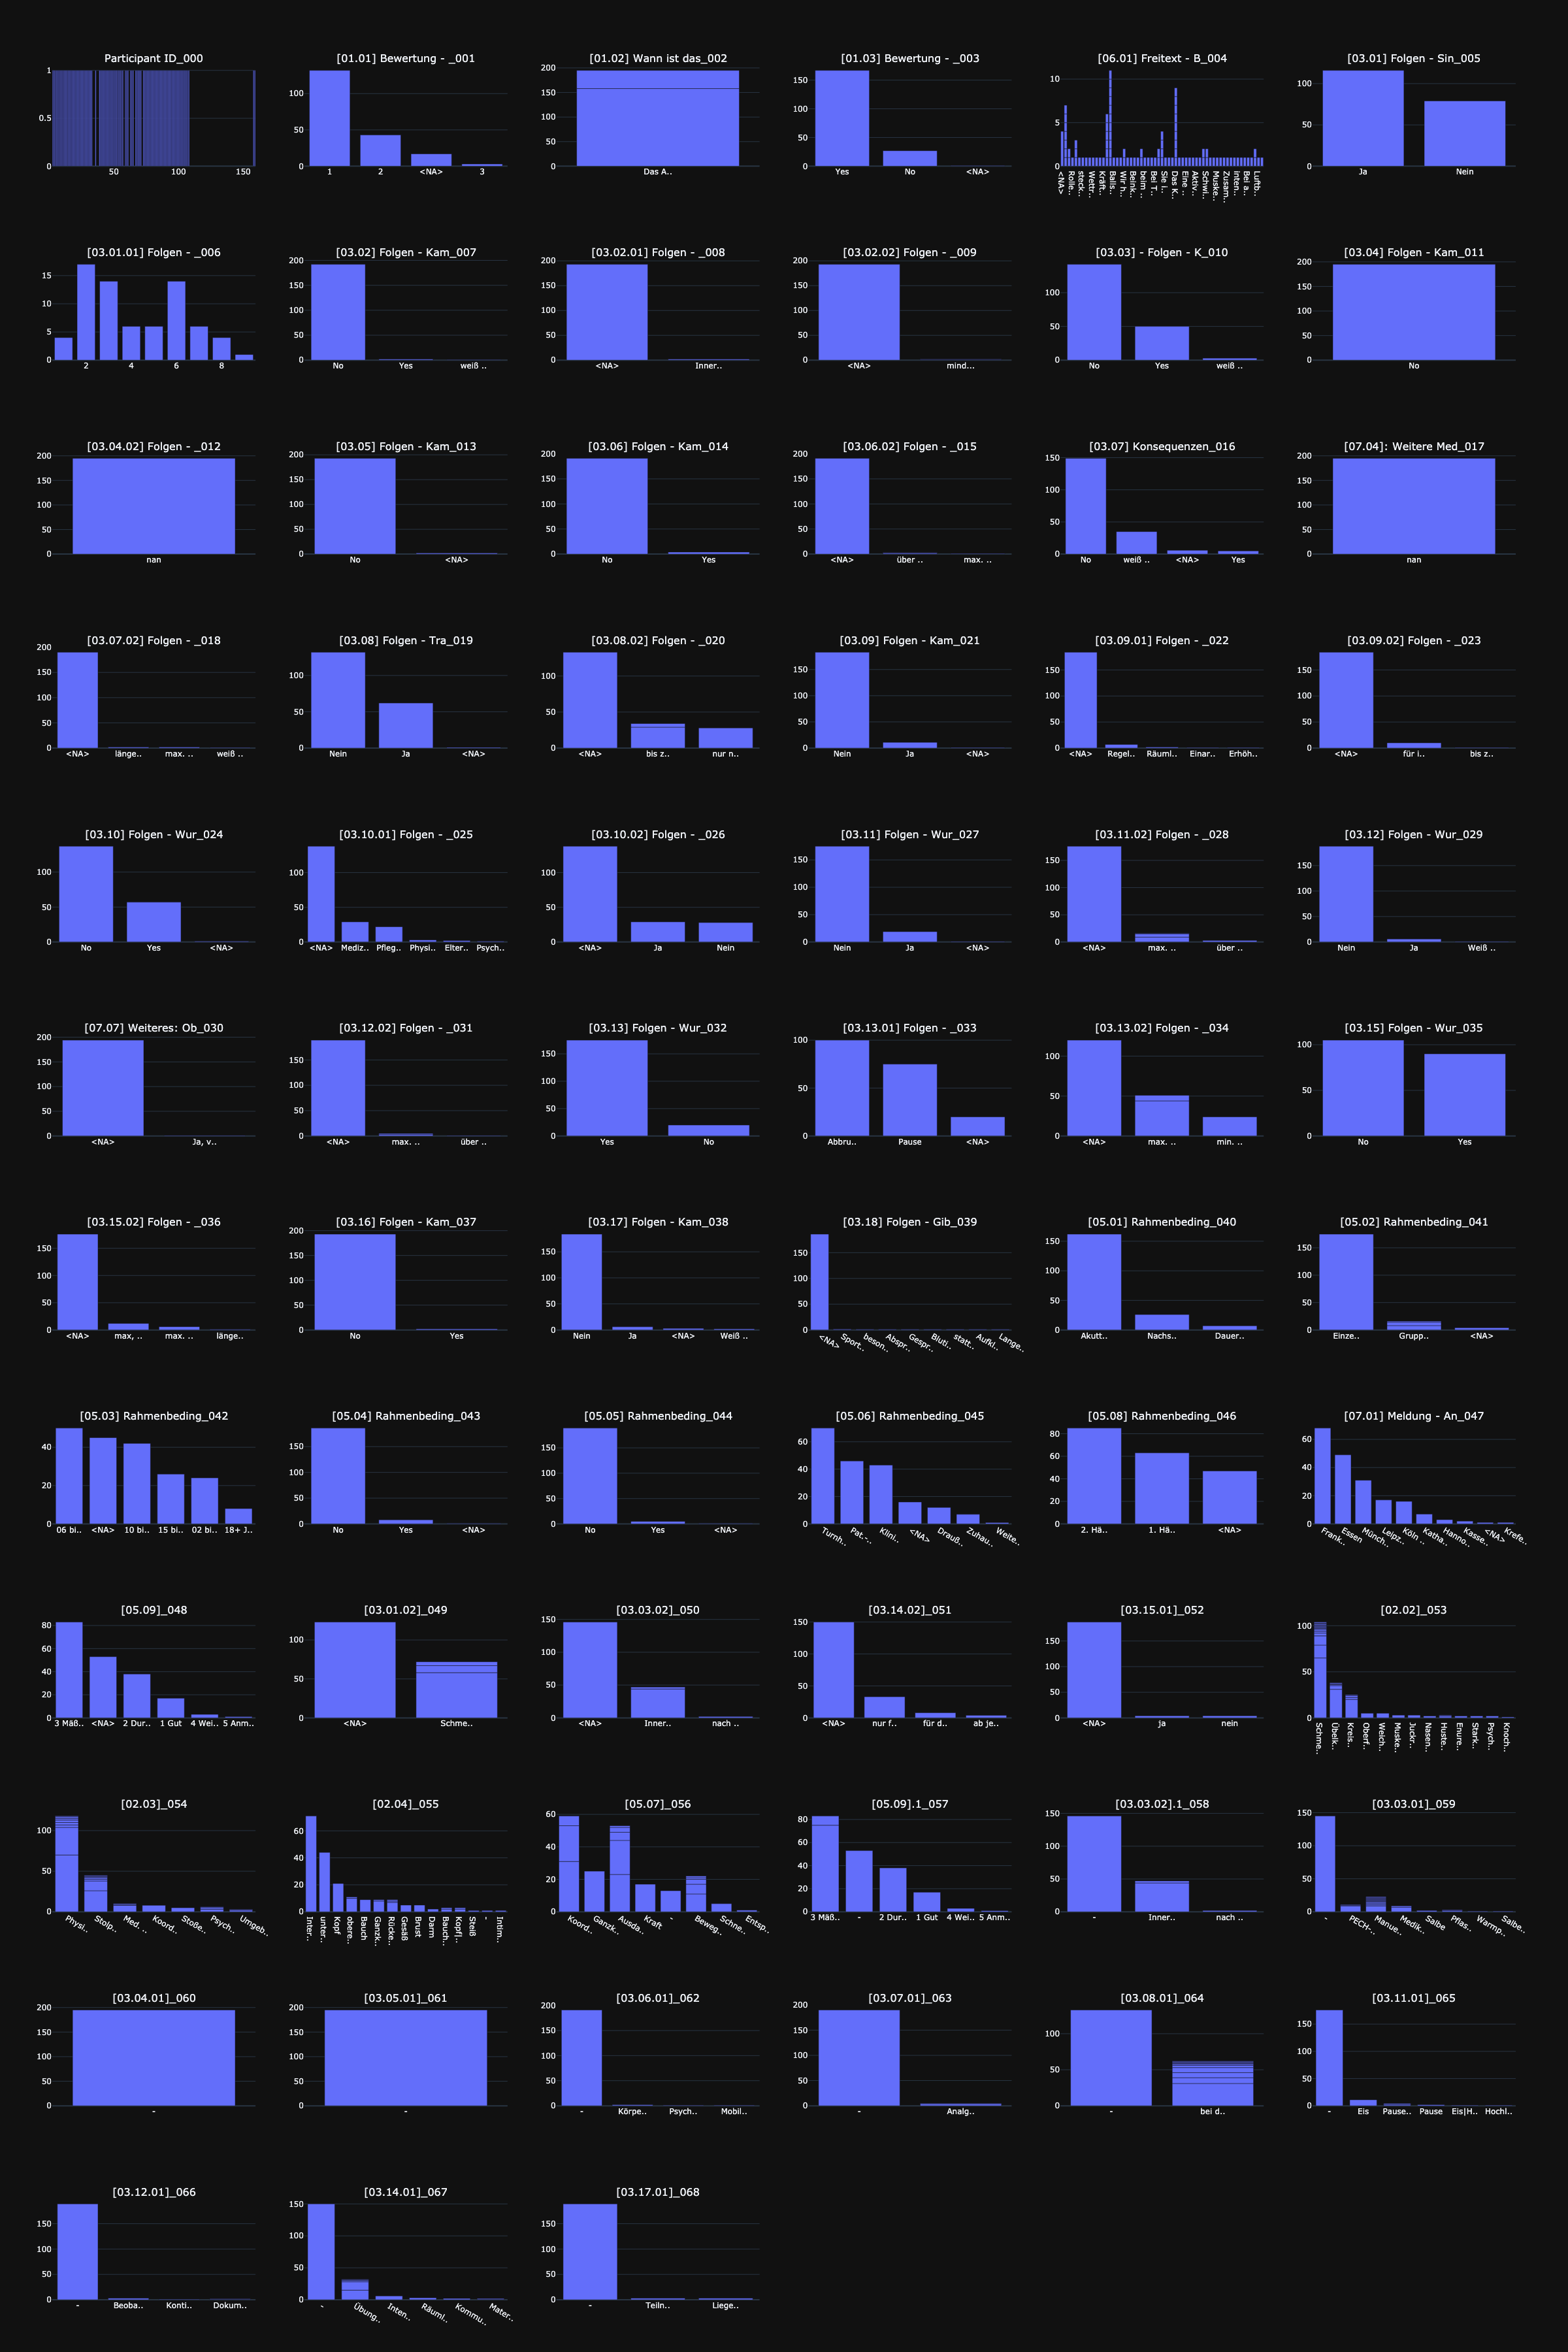

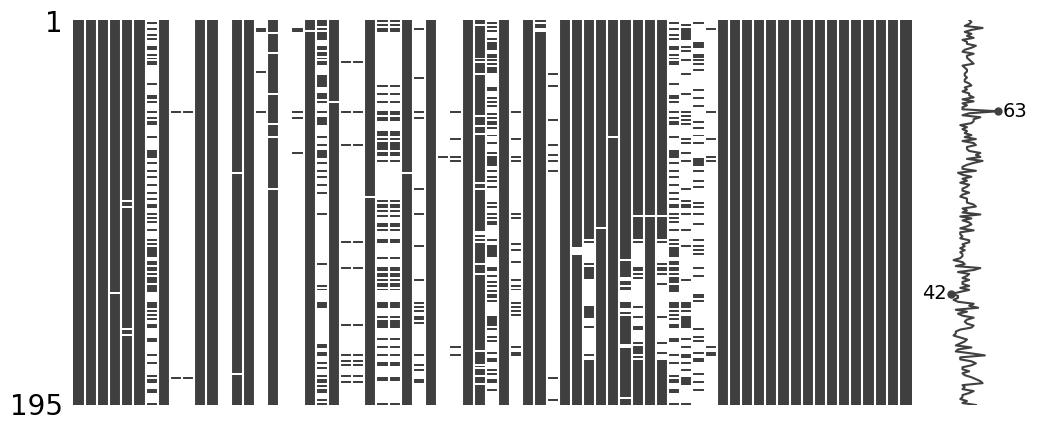

In [6]:
df_csv_condensed = (
    pd.read_csv(
        dir_data_out / "df_csv_condensed.csv",
        sep=";",
        encoding="utf-8-sig",
        index_col=None,
    ))

# * mark columns that should be str instead of float, fuzzy
col_int = get_cols(all_cols=df_csv_condensed.columns, stubs=["[01.01]"])

# * 
df_csv_condensed = (df_csv_condensed
        .astype({col_int[0]:"Int64"})
        .astype({col_int[0]:str})
)

tbl.describe_df(
    df_csv_condensed.iloc[:, :],
    "condensed",
    top_n_uniques=2,
    top_n_chars_in_index=5,
    use_plot=True,
    top_n_chars_in_columns=20,
    use_missing=True,
    fig_cols=6,
)

## <a id='toc1_3_'></a>[interactive](#toc0_)

In [9]:
get_cols(df_csv_condensed, ["CTC"])

['[01.01] Bewertung - CTCAE-Bewertung']

In [11]:
if False:
    import pygwalker as pyg

    _=pyg.walk(
        dataset=df_csv_condensed,
        appearance=os.getenv("THEME"),
        kernel_computation=True,
    )

## <a id='toc1_4_'></a>[analysis showcase 📈](#toc0_)

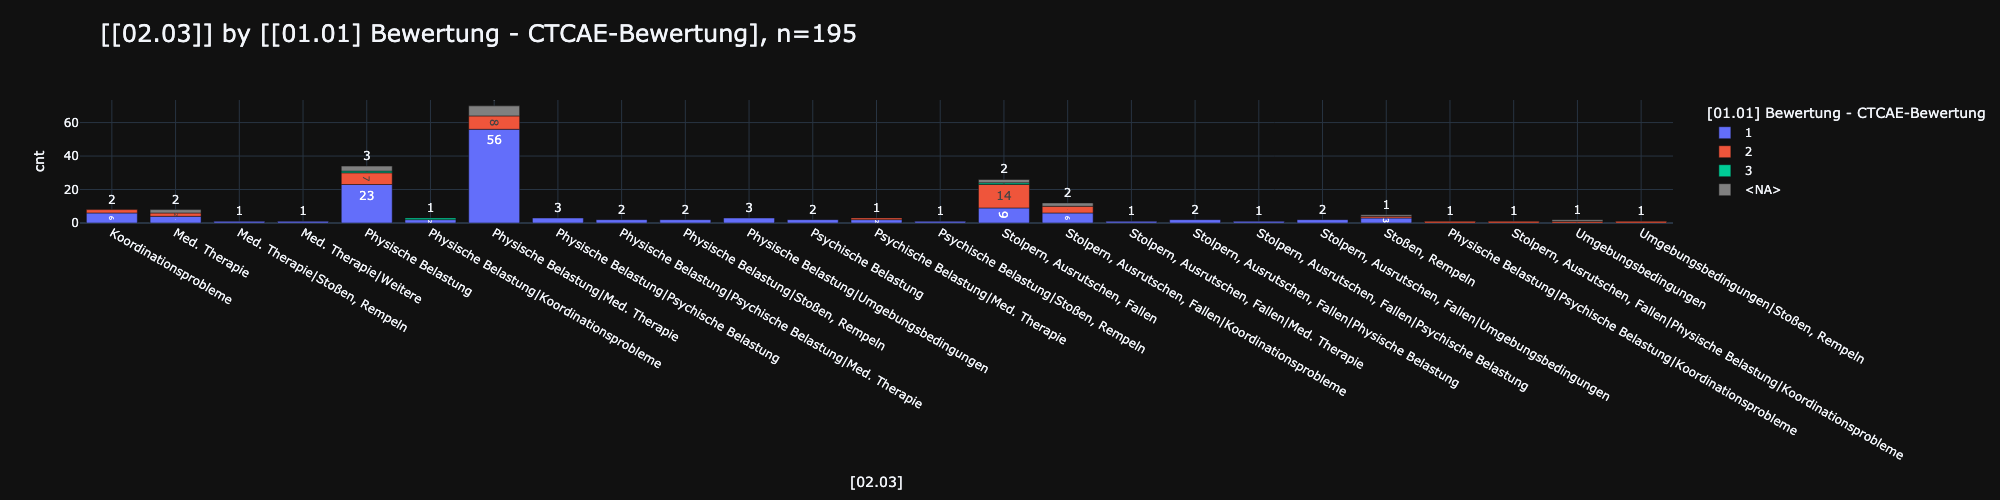

In [10]:
_col = get_cols(df_csv_condensed, ["[01.01]","[02.03]"])
_df = df_csv_condensed[_col]
_=pls.plot_stacked_bars(_df, swap=True, png_path="../docs/img/trigger_ctcae.png")

In [15]:
import streamlit as st
import pygwalker as pyg

# Render PyGWalker widget
pyg_app = pyg.walk(df_csv_condensed).to_html()

# Embed the PyGWalker app in Streamlit
# st.components.v1.html(pyg_app)
st.components.v1.html(pyg_app, height=1000, scrolling=True)

Box(children=(HTML(value='\n<div id="ifr-pyg-00062e97c7039342HUqJNyg1boneKFSw" style="height: auto">\n    <hea…

2025-02-20 20:21:14.206 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-20 20:21:14.317 
  command:

    streamlit run /Users/dexter/Documents/repos/github/sport-adverse-events/.venv/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-02-20 20:21:14.318 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()